In [1]:
import numpy as np
import qutip as qu
from error_estimation import single_generate_mse
from functools import partial

In [2]:
# dimension = 2
# epsilon = 0.0001
n_matrices = 10000
max_dimension =6

epsilons = [1E-2/10**i for i in range(7)]
dimensions = np.arange(2, max_dimension+1)

rng = np.random.default_rng(1)


In [36]:
epsilons
dimensions

array([2, 3, 4, 5, 6])

In [37]:
dimension_i = 5
np.arange(1, dimension_i)
rng.choice(np.arange(1, dimension_i))

2

In [38]:
# rhos = [[qu.rand_dm(d)[:] for _ in range(n_matrices)]for d in dimensions]

In [39]:
dimension_i = 3
possible_ranks = np.arange(1, dimension_i)
rank = rng.choice(possible_ranks)
A = qu.rand_dm_ginibre(N=dimension_i, rank=rank)
# print(A)

dimension_i = 3
print(possible_ranks)
print(np.linalg.eig(A)[0])


[1 2]
[ 7.33307438e-01+7.72334076e-18j -1.35972791e-17-9.25686228e-18j
  2.66692562e-01-4.56429046e-18j]


In [40]:
solutions_diff_dimensions = []
for dimension in dimensions:
    solutions_per_eps_same_dim=[]
    for epsilon in epsilons:
        print(f"Dim: {dimension}, Eps: {epsilon}")
        
        


        partial_mse = partial(
            single_generate_mse, epsilon=epsilon, dimension=dimension
        )

        # possible_ranks = np.arange(1, dimension+1)
        # rhos = [qu.rand_dm_ginibre(N=dimension, rank=rng.choice(possible_ranks))[:]  for _ in range(n_matrices)]
        rhos = [qu.rand_dm_ginibre(N=dimension, rank=None)[:]  for _ in range(n_matrices)]
        mse_list_over_rhos = qu.parallel.parfor(partial_mse, rhos)
        solutions_per_eps_same_dim.append(mse_list_over_rhos)
    solutions_diff_dimensions.append(solutions_per_eps_same_dim)


Dim: 2, Eps: 0.01
Dim: 2, Eps: 0.001
Dim: 2, Eps: 0.0001
Dim: 2, Eps: 1e-05
Dim: 2, Eps: 1e-06
Dim: 2, Eps: 1e-07
Dim: 2, Eps: 1e-08
Dim: 3, Eps: 0.01
Dim: 3, Eps: 0.001
Dim: 3, Eps: 0.0001
Dim: 3, Eps: 1e-05
Dim: 3, Eps: 1e-06
Dim: 3, Eps: 1e-07
Dim: 3, Eps: 1e-08
Dim: 4, Eps: 0.01
Dim: 4, Eps: 0.001
Dim: 4, Eps: 0.0001
Dim: 4, Eps: 1e-05
Dim: 4, Eps: 1e-06
Dim: 4, Eps: 1e-07
Dim: 4, Eps: 1e-08
Dim: 5, Eps: 0.01
Dim: 5, Eps: 0.001
Dim: 5, Eps: 0.0001
Dim: 5, Eps: 1e-05
Dim: 5, Eps: 1e-06
Dim: 5, Eps: 1e-07
Dim: 5, Eps: 1e-08
Dim: 6, Eps: 0.01
Dim: 6, Eps: 0.001
Dim: 6, Eps: 0.0001
Dim: 6, Eps: 1e-05
Dim: 6, Eps: 1e-06
Dim: 6, Eps: 1e-07
Dim: 6, Eps: 1e-08


In [41]:
import joblib

joblib.dump(solutions_diff_dimensions, "results_aggregated_ginibre_full_rank.job")

['results_aggregated_ginibre_full_rank.job']

In [7]:
len(solutions_diff_dimensions)


5

## Dimension 2

In [3]:
import joblib
solutions_diff_dimensions = joblib.load("results_aggregated_ginibre_full_rank.job")

(5, 35, 1000)

(5, 7, 1000)

In [43]:
np.array(solutions_diff_dimensions).shape

(5, 7, 10000)

In [4]:
mse_list = solutions_diff_dimensions[0]


In [5]:
np.array(mse_list).shape

(7, 10000)

In [6]:
all_data_array = np.array(solutions_diff_dimensions)

In [7]:
mus = np.mean(all_data_array, axis=2)
stds = np.std(all_data_array, axis=2)

In [8]:
mus.shape

(5, 7)

In [9]:
import matplotlib.pyplot as plt

[]

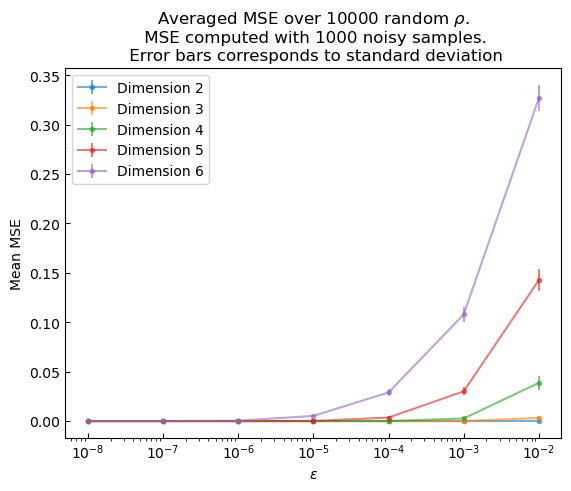

In [10]:
for i in range(mus.shape[0]):
    dimension = dimensions[i]
    plt.errorbar(epsilons, mus[i, :],yerr=stds[i, :] , marker = '.',alpha=0.6,    label=f'Dimension {dimension}')
    # plt.plot(epsilons, mus[i, :], 'o', label=f'Dimension {dimension}')
    # plt.fill_between(epsilons, mus[i, :] -stds[i, :],  mus[i, :] +stds[i, :], alpha=0.2 )

plt.legend()
# plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\epsilon$')
plt.ylabel(f'Mean MSE')
plt.title('Averaged MSE over 10000 random '+r'$\rho$' +".\n MSE computed with 1000 noisy samples.\n Error bars corresponds to standard deviation")
plt.tick_params(direction="in")
plt.plot()

[]

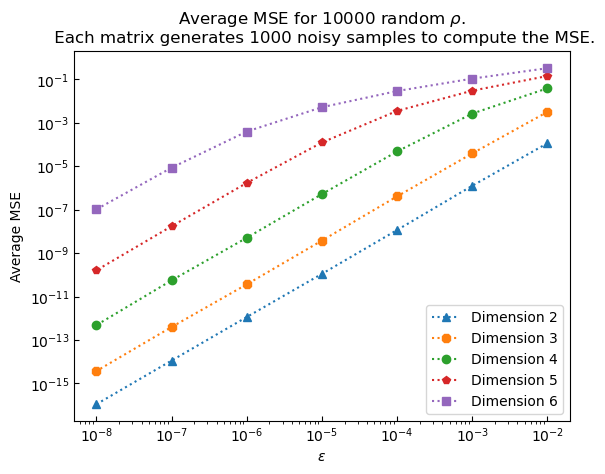

In [27]:
markers =  ["^", "8", "o", "p", "s" ]

for i in range(mus.shape[0]):
    dimension = dimensions[i]
    # plt.errorbar(epsilons, mus[i, :],yerr=stds[i, :] , marker = '.',alpha=0.6,    label=f'Dimension {dimension}')
    plt.plot(epsilons, mus[i, :], marker=markers[i], label=f'Dimension {dimension}', ls="dotted")
    # plt.fill_between(epsilons, mus[i, :] -stds[i, :],  mus[i, :] +stds[i, :], alpha=0.2 )

plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\epsilon$')
plt.ylabel(f'Average MSE')
plt.title('Average MSE for 10000 random '+r'$\rho$' +".\n Each matrix generates 1000 noisy samples to compute the MSE." )

# plt.title(' Mean MSE using 10000 random '+r'$\rho$' +".\n Each matrix generates 1000 noisy samples within   used to compute the MSE." )
plt.tick_params(direction="in")
plt.plot()